In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn
import matplotlib.pyplot as plt
import torch.nn.functional as F

import random
from torchvision import datasets, transforms
from torch import optim

In [2]:
random.seed(34)
k=4
hlist=[]
for i in range(k):
    h1=[]
    for j in range(k):
        h1.append(random.random())
    hlist.append(h1)
# hlist

n=100
theta=torch.randn(1,n)
theta_temp=theta
# theta_c=torch.randn(1,n)
# theta=torch.complex(theta_r,theta_c)

hr=[]
for i in range(k):
    hr_r=torch.randn(1,n)
    hr_c=torch.randn(1,n)
    hr.append(hr_r)
# print(hr)


In [3]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)

In [4]:
# Layer details for the neural network
input_size = k*k
hidden=1028
hidden1=640
hidden2=320
output_size = n


model = nn.Sequential(nn.Linear(input_size, hidden),
                      nn.ReLU(),
                      nn.Linear(hidden, hidden1),
                      nn.ReLU(),
                      nn.Linear(hidden1,hidden2),
                      nn.ReLU(),
                      nn.Linear(hidden2, output_size),
                      nn.Sigmoid())
model.apply(init_weights)
print(model)

Sequential(
  (0): Linear(in_features=16, out_features=1028, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1028, out_features=640, bias=True)
  (3): ReLU()
  (4): Linear(in_features=640, out_features=320, bias=True)
  (5): ReLU()
  (6): Linear(in_features=320, out_features=100, bias=True)
  (7): Sigmoid()
)


/tmp/ipykernel_1183086/239054705.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(m.weight)


In [5]:
def run(epochs,std,P,h,hlist,hr):
#     loss=0
    rate=[]
    for e in range(epochs):
        running_loss = 0
        model.train()

        # Training pass
        optimizer.zero_grad()
        output = model(h)
        theta_2=torch.zeros(1,n)
        for i in range(len(output)):
            theta_2[0][i]=output[i]
#         print(theta_2.size())
#         print(torch.transpose(hr[0],0,1).size())
        loss=0
        for i in range(k):
            interference=0
            for j in range(k):
                if(i==j):
#                     print(matmul_complex(theta_2,torch.transpose(hr[i],0,1)))
                    signal=P*torch.abs(hlist[i][j]+torch.matmul(output,torch.transpose(hr[i],0,1)))
                else:
                    interference+=P*torch.abs(hlist[i][j]+torch.matmul(output,torch.transpose(hr[j],0,1)))
            loss+=torch.log2(1+(signal/(std*std+(interference))))
        rate.append(loss)
        loss=-(1/(k*k))*loss
        loss.backward()
        optimizer.step()
        
    return(rate)

In [6]:
h=[]
for i in range(k):
    for j in hlist[i]:
        h.append(j)
h=torch.tensor(h)

In [7]:
optimizer=optim.Adam(model.parameters(),lr=0.01)
P=1
ebn0=5
std=P/(10**(ebn0/10))
runs=200
rates=[]
ep=50
for i in range(runs):
    rates.append(run(ep,std,P,h,hlist,hr))
average_rate = [sum(sub_list) / len(sub_list) for sub_list in zip(*rates)]

Text(0, 0.5, 'Throughput')

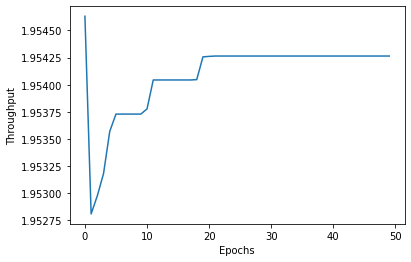

In [8]:
plt.plot(average_rate)
plt.xlabel('Epochs')
plt.ylabel('Throughput')

In [9]:
std

0.31622776601683794

In [10]:
output=model(h)

In [11]:
# powers=P*powers
# powers

In [12]:
rate=0
for i in range(k):
    interference=0
    for j in range(k):
        if(i==j):
#                     print(matmul_complex(theta_2,torch.transpose(hr[i],0,1)))
            signal=P*torch.abs(hlist[i][j]+torch.matmul(output,torch.transpose(hr[i],0,1)))
        else:
            interference+=P*torch.abs(hlist[i][j]+torch.matmul(output,torch.transpose(hr[j],0,1)))
    rate+=torch.log2(1+(signal/(std*std+(interference))))
print(rate)

tensor([1.9543], grad_fn=<AddBackward0>)


In [13]:
rate=0
for i in range(k):
    interference=0
    for j in range(k):
        if(i==j):
#                     print(matmul_complex(theta_2,torch.transpose(hr[i],0,1)))
            signal=P*torch.abs(hlist[i][j]+torch.matmul(theta_temp,torch.transpose(hr[i],0,1)))
        else:
            interference+=P*torch.abs(hlist[i][j]+torch.matmul(theta_temp,torch.transpose(hr[j],0,1)))
    rate+=torch.log2(1+(signal/(std*std+(interference))))
print(rate)

tensor([[1.7059]])


In [14]:
ar=[]
for i in average_rate:
    ar.append((i.item()))
print(ar)

[1.954630732536316, 1.9528084993362427, 1.952976107597351, 1.953181266784668, 1.9535702466964722, 1.9537287950515747, 1.9537287950515747, 1.9537287950515747, 1.9537287950515747, 1.9537287950515747, 1.9537765979766846, 1.9540432691574097, 1.9540432691574097, 1.9540432691574097, 1.9540432691574097, 1.9540432691574097, 1.9540432691574097, 1.9540432691574097, 1.9540464878082275, 1.9542561769485474, 1.9542607069015503, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682, 1.9542639255523682]
